In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
districts = gpd.read_file('../data/police_precinct_district_outlines.geojson')
print(districts.crs)
districts.head( )

EPSG:4326


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."


In [3]:
type(districts)

geopandas.geodataframe.GeoDataFrame

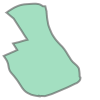

In [4]:
districts.loc[0, 'geometry']

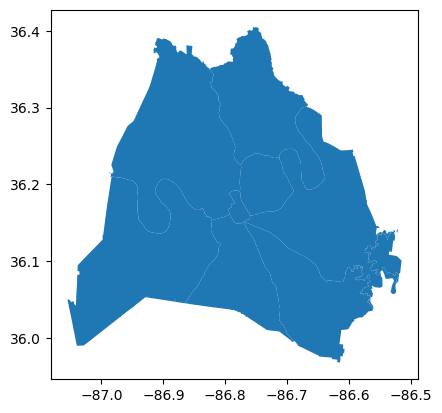

In [5]:
districts.plot();

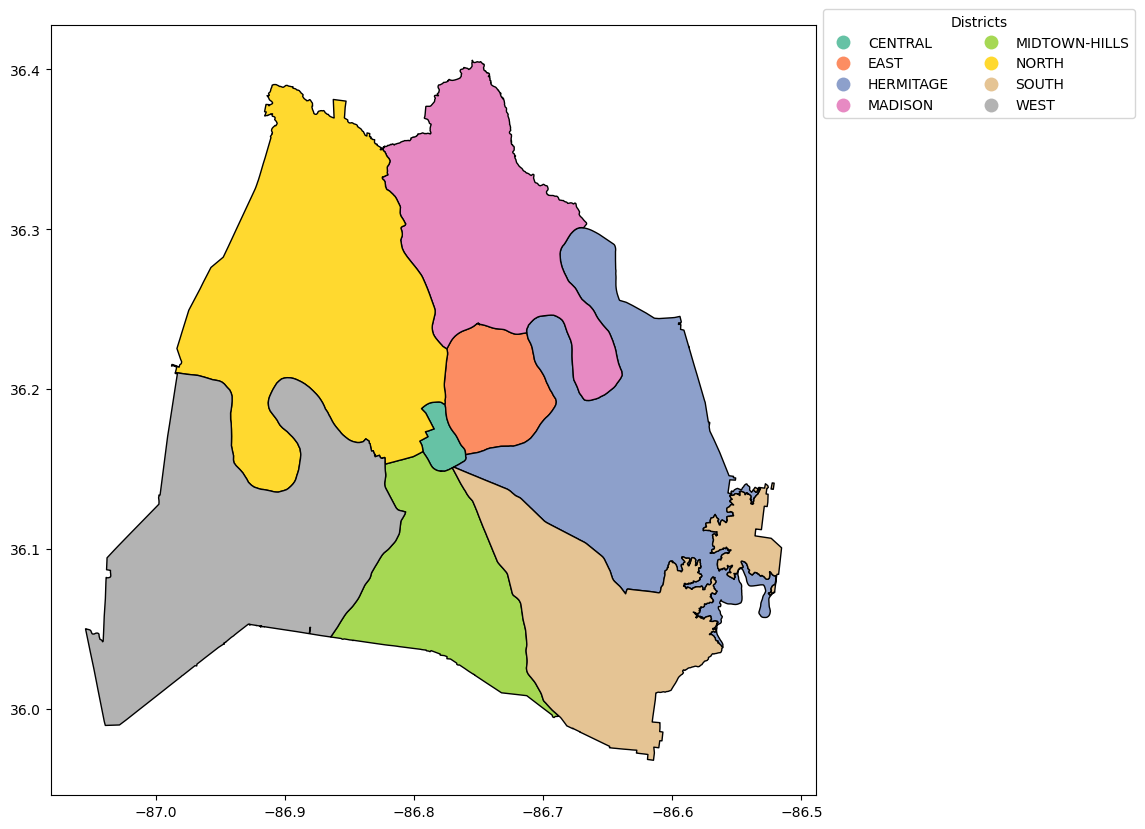

In [6]:
leg_kwds = {'title': 'Districts', 'loc': 'upper left', #adding title
            'bbox_to_anchor': (1, 1.03), 'ncol': 2} #breaking it in to two colums

districts.plot(column = 'precinct', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2') #color map
plt.show()

In [7]:
accidents = gpd.read_file('../data/traffic_accidents.geojson')
print(accidents.shape)
accidents.head(3)

(211900, 25)


,city,rpa,zip,state,weather_description,harmfuldescriptions,number_of_injuries,collision_type,date_and_time,harmfulcodes,...,illuaccidemination,accident_number,collision_type_description,illumination_description,street_address,number_of_fatalities,weather,property_damage,lat,geometry
0,GOODLETTSVILLE,1751,37072,TN,None,None,1,0,2023-12-14 19:57:00,7,...,3,20230748466,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - LIGHTED,RIVERGATE MALL PVTDR & CONFERENCE DR,0,None,None,36.3042,POINT (-86.69430 36.30420)
1,NASHVILLE,6405,37215,TN,CLEAR,PARKED MOTOR VEHICLE,0,5,2023-12-14 13:45:00,14,...,1,20230748417,SIDESWIPE - SAME DIRECTION,DAYLIGHT,HILLSBORO PKE & RICHARD JONES RD,0,21,None,36.1045,POINT (-86.81490 36.10450)
2,MADISON,1704,37115,TN,None,MOTOR VEHICLE IN TRANSPORT,0,11,2023-12-14 18:23:00,12,...,3,20230748368,Front to Rear,DARK - LIGHTED,MM 92 6 I 65,0,None,None,36.2702,POINT (-86.73640 36.27020)


In [8]:
accidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 211900 entries, 0 to 211899
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   city                        211900 non-null  object        
 1   rpa                         211329 non-null  object        
 2   zip                         211327 non-null  object        
 3   state                       211900 non-null  object        
 4   weather_description         205875 non-null  object        
 5   harmfuldescriptions         209571 non-null  object        
 6   number_of_injuries          211900 non-null  object        
 7   collision_type              211887 non-null  object        
 8   date_and_time               211900 non-null  datetime64[ns]
 9   harmfulcodes                211899 non-null  object        
 10  reporting_officer           211889 non-null  object        
 11  hit_and_run                 211

In [9]:
accidents = accidents[['zip', 'number_of_injuries', 'geometry', 'lat', 'long']]

In [10]:
accidents.head(3)

,zip,number_of_injuries,geometry,lat,long
0,37072,1,POINT (-86.69430 36.30420),36.3042,-86.6943
1,37215,0,POINT (-86.81490 36.10450),36.1045,-86.8149
2,37115,0,POINT (-86.73640 36.27020),36.2702,-86.7364


In [11]:
type(accidents)

geopandas.geodataframe.GeoDataFrame

In [12]:
accdist = gpd.sjoin(accidents, districts, predicate = 'within')

In [13]:
accdist.head()

,zip,number_of_injuries,geometry,lat,long,index_right,precinct,shape_area,shape_len
0,37072,1,POINT (-86.69430 36.30420),36.3042,-86.6943,3,MADISON,1913402934.01,254564.86409
2,37115,0,POINT (-86.73640 36.27020),36.2702,-86.7364,3,MADISON,1913402934.01,254564.86409
6,37115,0,POINT (-86.75690 36.26600),36.266,-86.7569,3,MADISON,1913402934.01,254564.86409
11,37115,0,POINT (-86.69130 36.25980),36.2598,-86.6913,3,MADISON,1913402934.01,254564.86409
16,37115,2,POINT (-86.73940 36.25320),36.2532,-86.7394,3,MADISON,1913402934.01,254564.86409


In [14]:
accdist['zip'].value_counts()

zip
37211    21218
37013    21004
37210    16575
37207    16248
37203    16229
37115    13773
37217    10821
37209     9993
37214     9832
37206     7405
37076     7302
37208     6717
37204     6346
37221     5143
37205     4617
37215     4453
37212     4280
37218     3865
37027     3352
37213     3233
37216     3200
37201     2656
37189     2420
37220     2179
37138     1923
37080     1508
37219     1404
37072     1139
37228     1093
37240      214
37135      137
37015       42
37122       28
Name: count, dtype: int64

In [15]:
accdist['precinct'].value_counts()

precinct
SOUTH            43369
HERMITAGE        35542
MIDTOWN-HILLS    33257
NORTH            23173
WEST             20919
MADISON          18098
EAST             18083
CENTRAL          17916
Name: count, dtype: int64

In [33]:
acc_in_37122 = accdist.loc[accdist['zip'] == '37122']
acc_in_37122.shape

(28, 9)

In [35]:
polygon37122 = districts.loc[districts['precinct'] == 'HERMITAGE'] #.loc is a location accessor?
#polygon37211.shape
polygon37122.head()

,precinct,shape_area,shape_len,geometry
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."


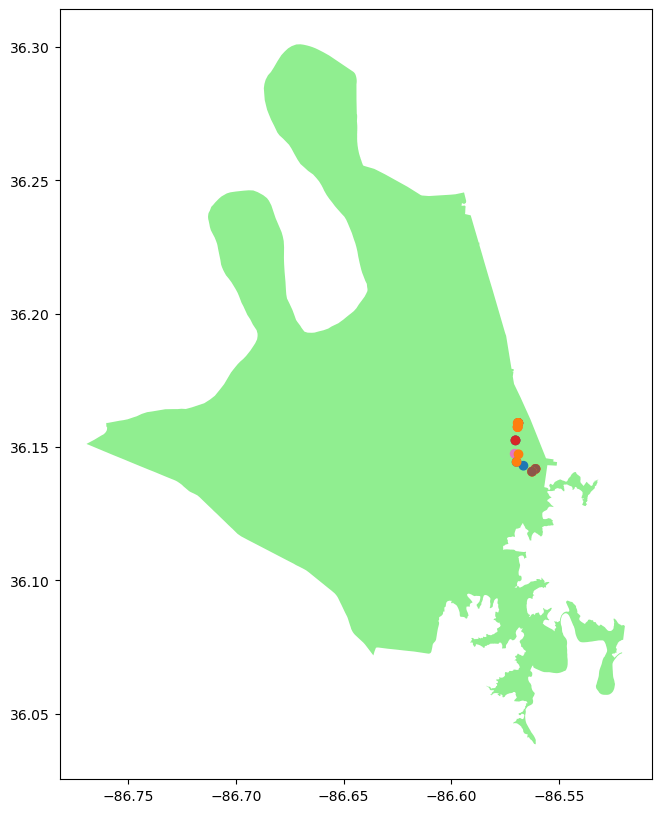

In [18]:
ax = polygon37122.plot(figsize = (8, 10), color = 'lightgreen')
acc_in_37122.plot( ax = ax, column = 'number_of_injuries'); #clolors them by number of injuries
plt.show();

In [19]:
polygon37122.geometry.centroid

C:\Users\brand\AppData\Local\Temp\ipykernel_15420\2120585577.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37122.geometry.centroid


2    POINT (-86.63656 36.16463)
dtype: geometry

In [20]:
center = polygon37122.geometry.centroid[2]

C:\Users\brand\AppData\Local\Temp\ipykernel_15420\3872172594.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37122.geometry.centroid[2]


In [21]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x] #constructing an array

# check the order of area_center, the location for our folium map
print(area_center)

[36.16462519995049, -86.63656471855752]


In [22]:
#create our map of Nashville Zip Code 37207 and show it
map_37122 = folium.Map(location =  area_center, zoom_start = 12)
map_37122

In [23]:
i = 0
for row_index, row_values in acc_in_37122.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 8261
values are:
 
zip                                      37122
number_of_injuries                           2
geometry              POINT (-86.5706 36.1475)
lat                                    36.1475
long                                  -86.5706
index_right                                  2
precinct                             HERMITAGE
shape_area                       2496337143.44
shape_len                        521944.947628
Name: 8261, dtype: object
------------------------- 
index is 21027
values are:
 
zip                                      37122
number_of_injuries                           1
geometry              POINT (-86.5702 36.1525)
lat                                    36.1525
long                                  -86.5702
index_right                                  2
precinct                             HERMITAGE
shape_area                       2496337143.44
shape_len                        521944.947628
Name: 21027, dtype: object
-----------------

In [25]:
#draw our zip code area: 37207
map_37122 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37122).add_to(map_37122)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in acc_in_37122.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['number_of_injuries']) #this gives additional info when clicking on the icons
    icon=folium.Icon(color="blue",icon="car", prefix='fa') #font awesome is fa and that makes it so we can pull the bus icon
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37122)
map_37122.save('../maps/map37122.html')

#display our map
map_37122

In [26]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [29]:
cluster_map_37122 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37122)

folium.GeoJson(polygon37122).add_to(cluster_map_37122)

# inside the loop add each marker to the cluster
for row_index, row_values in acc_in_37122.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['number_of_injuries'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37122.save('../maps/cluster37122.html')

cluster_map_37122  

###Making a cluster map with the district with the most accidents

In [36]:
acc_in_37211 = accdist.loc[accdist['zip'] == '37211']
acc_in_37211.shape

(21218, 9)

In [37]:
polygonC = districts.loc[districts['precinct'] == 'SOUTH'] #.loc is a location accessor?
#polygon37211.shape
polygon37211.head()

,precinct,shape_area,shape_len,geometry
6,SOUTH,1936875931.39,422441.749973,"MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ..."


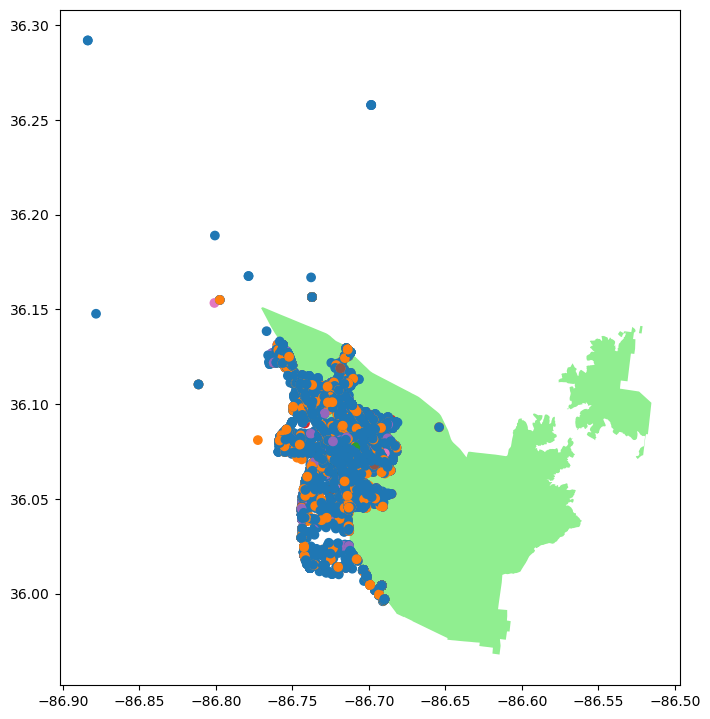

In [38]:
ax = polygon37211.plot(figsize = (8, 10), color = 'lightgreen')
acc_in_37211.plot( ax = ax, column = 'number_of_injuries'); #clolors them by number of injuries
plt.show();

In [ ]:
polygon37211.geometry.centroid